# Reading The Dataset

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_raw= pd.read_csv('train.csv')
data2_raw=pd.read_csv('test.csv')

print(data_raw.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

## Exploratory Data Analysis (eda) - Outliers

In [387]:
data_raw.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [388]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# As we can see above result, the null values only exist in 2 columns which are Item_Weight and Outlet_Size

In [389]:
data_raw.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Handling Null Values

In [390]:
def handle_null(data):
    Weight_mean=data['Item_Weight'].mean()
    data['Item_Weight']=data['Item_Weight'].replace(np.nan,Weight_mean)
    outlet_size_mode=data['Outlet_Size'].mode()[0]
    data['Outlet_Size']=data["Outlet_Size"].replace(np.nan,outlet_size_mode)
    data.isnull().sum()
    return data
    
data=handle_null(data_raw)

## Exploratory Data Analysis (eda) - Graphs

(array([ 483.,  870.,  865.,  664., 2242.,  629.,  755.,  735.,  677.,
        603.]), array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
       16.3115, 17.991 , 19.6705, 21.35  ]), <BarContainer object of 10 artists>)
(array([2639., 2329., 1563.,  979.,  593.,  279.,   60.,   35.,   29.,
         17.]), array([0.        , 0.03283909, 0.06567819, 0.09851728, 0.13135638,
       0.16419547, 0.19703457, 0.22987366, 0.26271276, 0.29555185,
       0.32839095]), <BarContainer object of 10 artists>)
(array([ 923.,  573., 1053., 1248.,  804., 1098., 1200.,  480.,  557.,
        587.]), array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
       172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]), <BarContainer object of 10 artists>)
(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
       3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]), array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
        6560.1274 ,  7

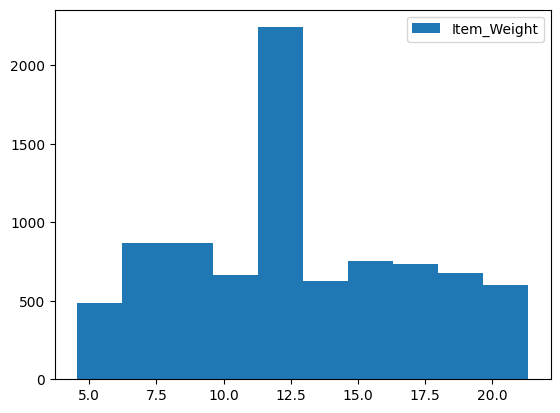

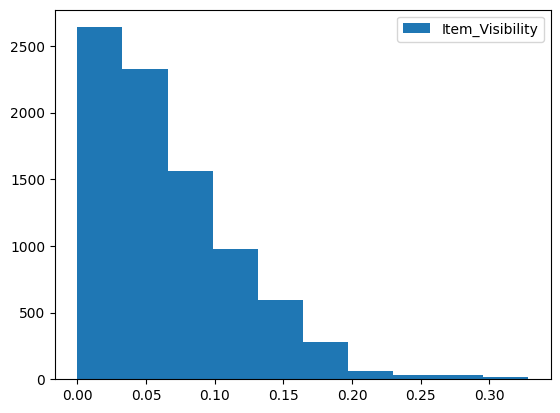

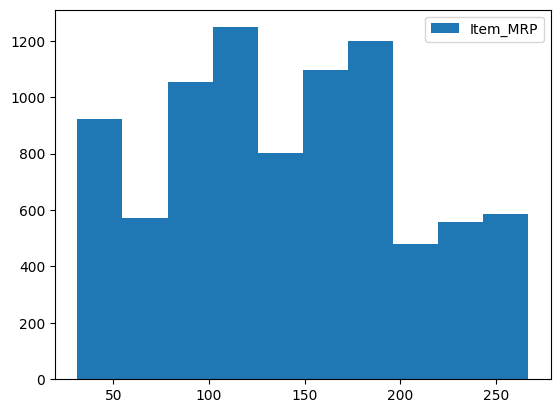

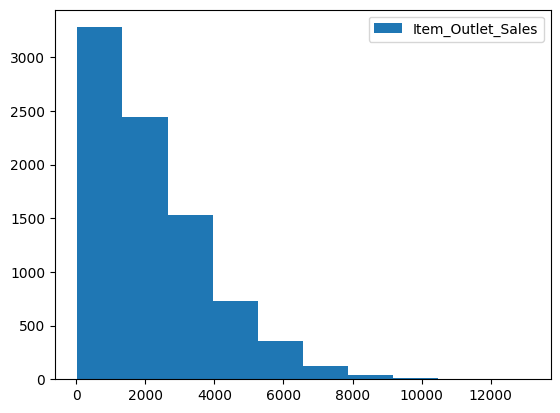

In [391]:
for i  in ["Item_Weight","Item_Visibility",'Item_MRP',"Item_Outlet_Sales"]:
    plt.figure()
    print(plt.hist(data[i],label=i))
    plt.legend()


### Drawing Scattter graphs to look for any relation between independant variables and Item_Outlet_Sales

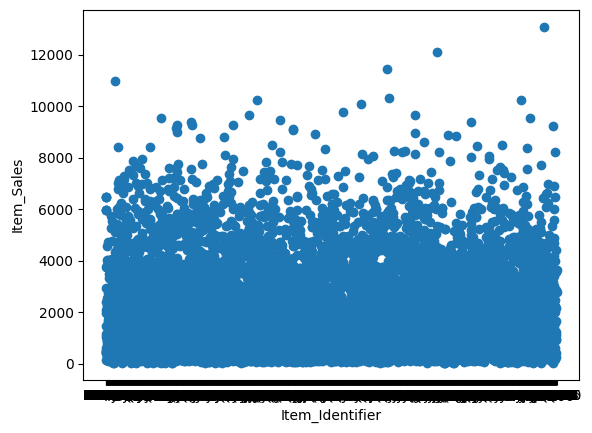

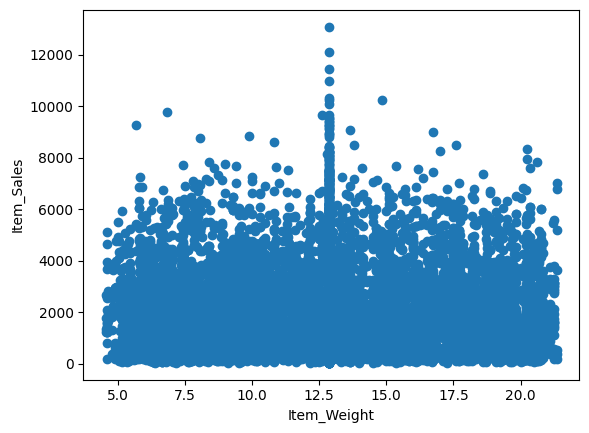

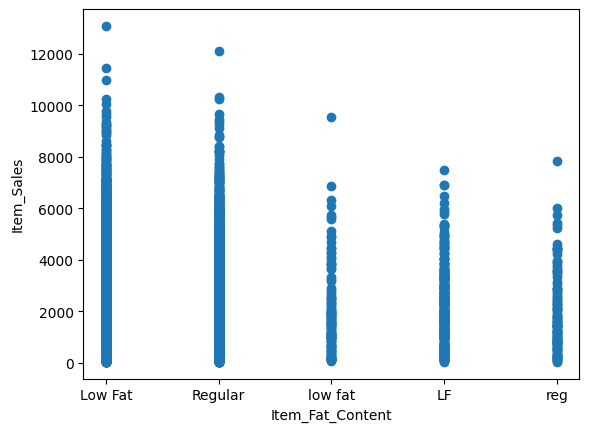

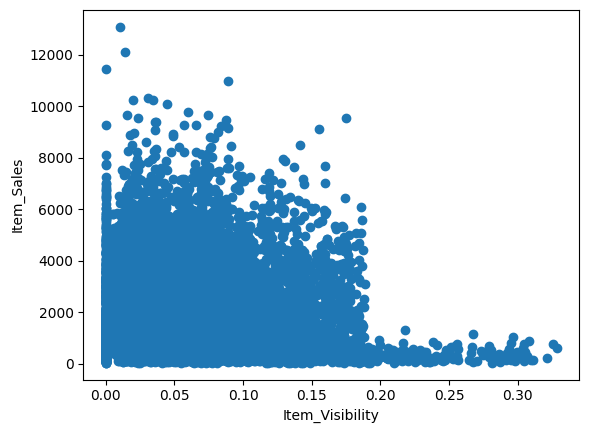

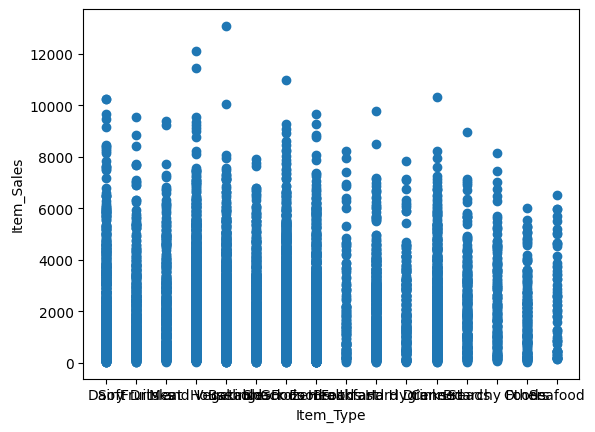

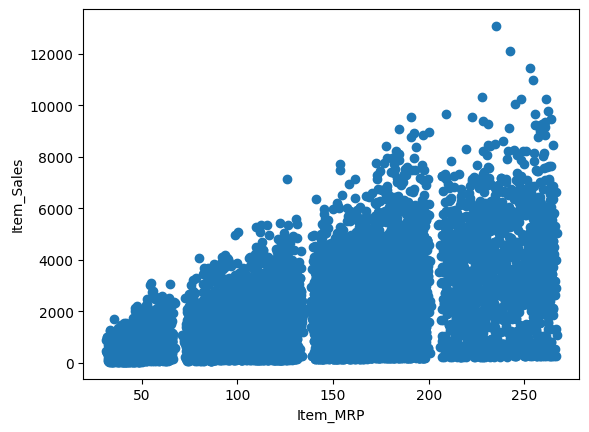

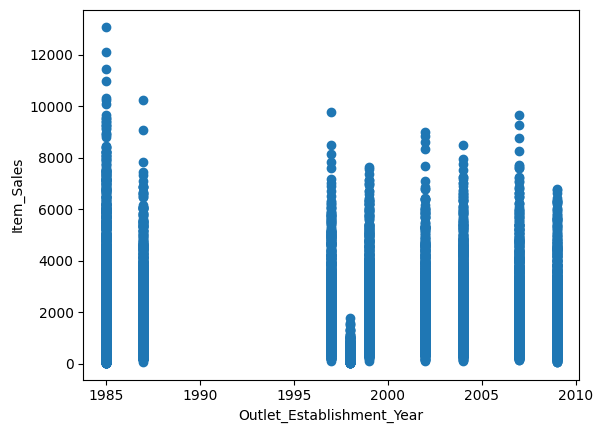

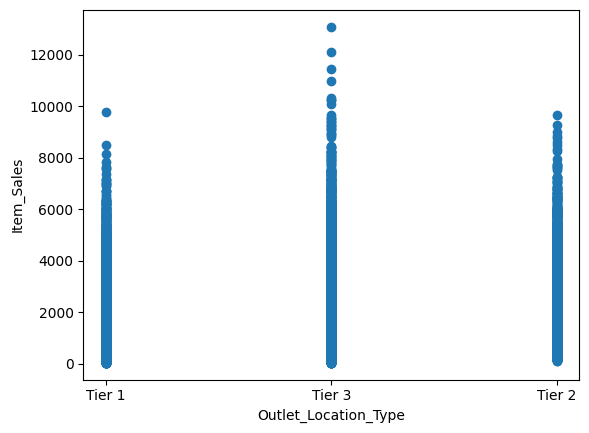

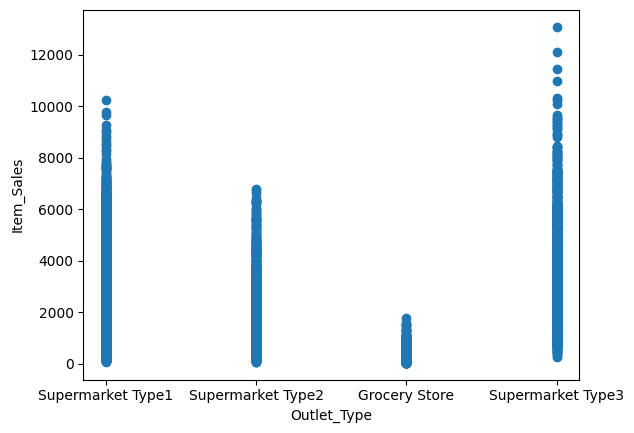

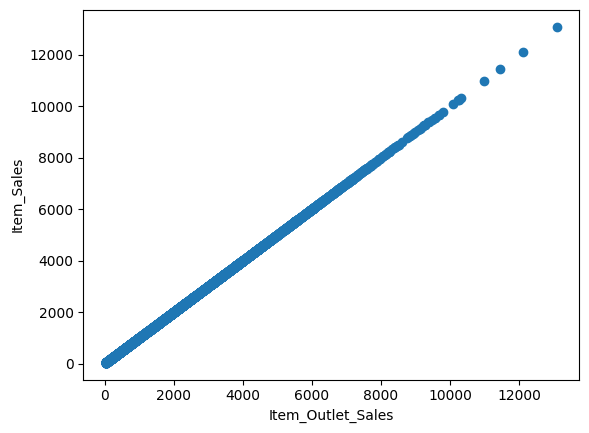

In [392]:
for i in data.columns:
    if i not in ["Outlet_Size","Outlet_Identifier"]:
        plt.figure()
        plt.scatter(data[i],data['Item_Outlet_Sales'])
        plt.xlabel(i)
        plt.ylabel('Item_Sales')
        plt.plot()

# Feature Engineering

In [393]:
def Feature_engineering(data):
    from sklearn import preprocessing
    
    outlet_type_dumm=pd.get_dummies(data=data['Outlet_Type'], drop_first=True)
    data=pd.concat([data,outlet_type_dumm],axis=1)

    data['Item_Code'] = data['Item_Identifier'].apply(lambda x: x[0:2])
    data[['Item_Identifier', 'Item_Code']].head()

    # these are many unique values for the item types, so it's not good idea to use one-hot encodeing,
    # it's better to use the frequency of occurance and This will preserve the information about the values of distributions
    Item_Type_freq = data['Item_Type'].value_counts(normalize=True)
    # Mapping the encoded values with original data 
    data['Item_Type_freq'] = data['Item_Type'].apply(lambda x : Item_Type_freq[x])
    print('The sum of Item_Type_freq variable:', sum(Item_Type_freq))

    data['Outlet_Location_Type']=data['Outlet_Location_Type'].apply(lambda x: x[-1])
    data.drop(["Outlet_Type",'Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year'],axis=1, inplace=True)
    
  
    label_encoder = preprocessing.LabelEncoder()
    data['Outlet_Size']= label_encoder.fit_transform(data['Outlet_Size'])
    data['Item_Code']= label_encoder.fit_transform(data['Item_Code'])
    data['Item_Fat_Content']= label_encoder.fit_transform(data['Item_Fat_Content'])
    data=data.apply(pd.to_numeric)
    return data
data=Feature_engineering(data)

The sum of Item_Type_freq variable: 1.0


# Now Time to Build the Model


In [394]:
from sklearn.linear_model import LinearRegression

model=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

y=data['Item_Outlet_Sales']
x=data.drop(['Item_Outlet_Sales'],axis=1)
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Code,Item_Type_freq
0,9.30,1,0.016047,249.8092,1,1,1,0,0,1,0.080019
1,5.92,2,0.019278,48.2692,1,3,0,1,0,0,0.052212
2,17.50,1,0.016760,141.6180,1,1,1,0,0,1,0.049865
3,19.20,2,0.000000,182.0950,1,3,0,0,0,1,0.144550
4,8.93,1,0.000000,53.8614,0,3,1,0,0,2,0.106770


## Feature re-scaling

In [395]:
# for the data re-Scaling we using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

def feature_scaling(x):
    # initialising the MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    columns=x.columns
    # learning the statistical parameters for each of the data and transforming
    x= scaler.fit_transform(x.to_numpy())
    x=pd.DataFrame(x, columns=columns)
    return x
x=feature_scaling(x)

## Seperating Training And Test Data 

In [396]:
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Running The Models

In [397]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5681614565014865

In [398]:
print(model.coef_)

[  30.09264738  119.04711556 -135.43075523 3687.21755024   83.98183185
   40.9067583  1954.34037701 1639.88088634 3362.90612312   27.69706202
   36.11032943]


In [399]:
data2=handle_null(data2_raw)
data2=Feature_engineering(data2)
data2=feature_scaling(data2)
data2.head()

The sum of Item_Type_freq variable: 1.0


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Code,Item_Type_freq
0,0.964275,0.25,0.023374,0.323413,0.5,0.0,1.0,0.0,0.0,0.5,1.000000
1,0.222983,1.00,0.118737,0.235849,0.5,0.5,1.0,0.0,0.0,0.5,0.561518
2,0.598095,0.25,0.307674,0.894140,0.5,1.0,0.0,0.0,0.0,1.0,0.112565
3,0.164335,0.25,0.047548,0.524488,0.5,0.5,1.0,0.0,0.0,0.5,1.000000
4,0.484706,0.50,0.366458,0.862069,0.5,1.0,0.0,0.0,1.0,0.5,0.561518


In [400]:
predicted=pd.DataFrame(model.predict(data2),columns=['Predicted_Item_Outlet_Sales'])
predicted.head()

,Predicted_Item_Outlet_Sales
0,1786.732903
1,1522.547530
2,1909.973924
3,2521.246191
4,5175.379246


## Saving the Final Prediction

In [401]:
predicted_data=pd.concat([data2_raw,predicted],axis=1)

In [402]:
predicted_data.to_csv('testANDresults.csv')